# Import Real Time Head Data for 14 kids (4 ADHD, 10 Healthy)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
adhd1 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886001_20170227_184017/A2RealTime_886001_20170227_184017.csv") # has no hands and feet data
adhd2 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886002_20170228_104813/A2RealTime_886002_20170228_104813.csv")#has not hands and feet data
adhd3 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886006_20170304_172008/A2RealTime_886006_20170304_172008.csv")
adhd4 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886010_20170305_132607/A2RealTime_886010_20170305_132607.csv")
adhd5 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886015_20170311_153739/A2RealTime_886015_20170311_153739.csv")
adhd6 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886016_20170311_184832/A2RealTime_886016_20170311_184832.csv")
adhd7 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886017_20170312_112519/A2RealTime_886017_20170312_112519.csv")
adhd8 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886018_20170317_192755/A2RealTime_886018_20170317_192755.csv")
adhd9 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886019_20170318_130057/A2RealTime_886019_20170318_130057.csv")
adhd10 =  pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886020_20170318_135002/A2RealTime_886020_20170318_135002.csv")
healthy1 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886003_20170228_130925/A2RealTime_886003_20170228_130925.csv")
healthy2 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886004_20170304_152912/A2RealTime_886004_20170304_152912.csv")
healthy3 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886005_20170304_160532/A2RealTime_886005_20170304_160532.csv")
healthy4 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886007_20170305_102310/A2RealTime_886007_20170305_102310.csv")
healthy5 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886008_20170305_105348/A2RealTime_886008_20170305_105348.csv")
healthy6 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886009_20170305_112726/A2RealTime_886009_20170305_112726.csv")
healthy7 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886011_20170309_190528/A2RealTime_886011_20170309_190528.csv")
healthy8 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886012_20170309_193106/A2RealTime_886012_20170309_193106.csv")
healthy9 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886013_20170309_200214/A2RealTime_886013_20170309_200214.csv")
healthy10 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886014_20170309_205449/A2RealTime_886014_20170309_205449.csv")
#adhd.set_index("Time", inplace = True);
#display(adhd.head())
ADHD = [adhd1, adhd2, adhd3, adhd4, adhd5, adhd6, adhd7,adhd8, adhd9, adhd10]
HEALTHY = [healthy1, healthy2, healthy3, healthy4, healthy5, healthy6, healthy7, healthy8, healthy9, healthy10]


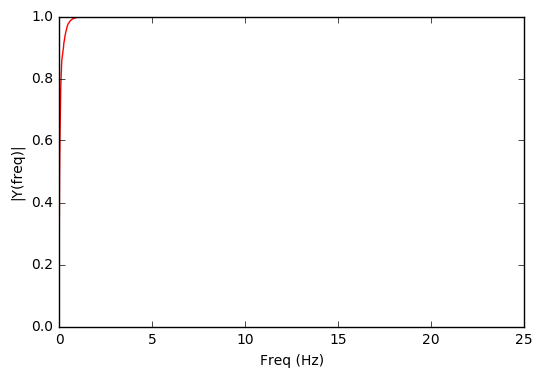

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange
def PowerSpectrumCumulative(y,Fs):
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(round(n/2))] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(round(n/2))]
    Z = []
    for i in range(len(Y)):
        Z.append(np.absolute(Y[i])**2)
    
    for i in range(len(Z)):
        if i == 0:
            pass
        else:
            Z[i] = Z[i] + Z[i-1]
    
    plt.ylim(0.0, 1.0)
    plt.plot(frq, Z/Z[len(Z)-1],'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')


Fs = 50.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval


PowerSpectrumCumulative(healthy3['PosX'],Fs)
plt.show()

In [29]:
def ninety_nine_percent(y,Fs):
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(round(n/2))] # one side frequency range

    Y = fft(y)
    Y = Y[range(round(n/2))]
    Z = []
    for i in range(len(Y)):
        Z.append(np.absolute(Y[i])**2)
    
    for i in range(len(Z)):
        if i == 0:
            pass
        else:
            Z[i] = Z[i] + Z[i-1]
    
    Z = Z/Z[len(Z)-1]
    for i in range(len(Z)):
        if Z[i] >= 0.99:
            return frq[i]
        
Fs = 50.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval

In [30]:
def print99(ADHDorHEALTHY):
    for item in ADHDorHEALTHY:
        print(ninety_nine_percent(item['RotX'],Fs), "  ")
        print(ninety_nine_percent(item['RotY'],Fs),  "  ")
        print(ninety_nine_percent(item['RotZ'],Fs),  "  ")
        print(ninety_nine_percent(item['PosX'],Fs),  "  ")
        print(ninety_nine_percent(item['PosY'],Fs),  "  ")
        print(ninety_nine_percent(item['PosZ'],Fs), "\n")
    


In [31]:
print ("ADHD KIDS")
print99(ADHD)
print ("HEALTHY KIDS")
print99(HEALTHY)

ADHD KIDS
0.280769230769   
4.10641025641   
0.214102564103   
0.194871794872   
0.0   
0.0 

0.280769230769   
4.07051282051   
0.214102564103   
0.194871794872   
0.0   
0.0 

0.280769230769   
4.07051282051   
0.214102564103   
0.194871794872   
0.0   
0.0 

0.280769230769   
4.07051282051   
0.214102564103   
0.194871794872   
0.0   
0.0 

HEALTHY KIDS
0.539743589744   
3.35   
3.30256410256   
0.707692307692   
0.0   
0.0 

0.296153846154   
3.24615384615   
0.266666666667   
0.00512820512821   
0.0   
0.0 

4.77307692308   
3.26282051282   
0.0102564102564   
0.676923076923   
0.0   
0.0 

0.0397435897436   
0.430769230769   
4.64102564103   
0.0807692307692   
0.0   
0.0 

0.925641025641   
0.676923076923   
1.51794871795   
0.0   
0.0   
0.0 

0.384615384615   
1.08333333333   
1.61538461538   
0.0115384615385   
0.0   
0.0 

0.0   
0.00512820512821   
0.0   
0.00128205128205   
0.0   
0.0 

0.0   
1.47564102564   
0.0   
0.0025641025641   
0.0   
0.0 

0.0025641025641   
12.59

In [17]:
Z = np.absolute(fft(adhd1['PosY'])/) ** 2
for i in range(len(Z)):
        if i == 0:
            pass
        else:
            Z[i] = Z[i] + Z[i-1]
print (Z)

[  1.79342740e+09   1.79391478e+09   1.79403928e+09 ...,   1.79576266e+09
   1.79588716e+09   1.79637454e+09]


In [2]:
from scipy.signal import butter, lfilter


def butter_lowpass(lowcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, [low], btype='lowpass')
    return b, a


def butter_lowpass_filter(data, lowcut, fs, order):
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [3]:
lowcut = 20.0
fs = 50.0
def filter(ADHDorHEALTHY):
    for item in ADHDorHEALTHY: 
        item['RotX'] = butter_lowpass_filter(item['RotX'], lowcut, fs, order=4)
        item['RotY'] = butter_lowpass_filter(item['RotY'], lowcut, fs, order=4)
        item['RotZ'] = butter_lowpass_filter(item['RotZ'], lowcut, fs, order=4)
        item['PosX'] = butter_lowpass_filter(item['PosX'], lowcut, fs, order=4)
        item['PosY'] = butter_lowpass_filter(item['PosY'], lowcut, fs, order=4)
        item['PosZ'] = butter_lowpass_filter(item['PosZ'], lowcut, fs, order=4)
        
filter(ADHD)
filter(HEALTHY)

# adhd1.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886001_20170227_184017/filtered_A2RealTime_886001_20170227_184017.csv")
# adhd2.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886002_20170228_104813/filtered_A2RealTime_886002_20170228_104813.csv")#has not hands and feet data
# adhd3.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886006_20170304_172008/filtered_A2RealTime_886006_20170304_172008.csv")
# adhd4.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886010_20170305_132607/filtered_A2RealTime_886010_20170305_132607.csv")
# adhd5.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886015_20170311_153739/filtered_A2RealTime_886015_20170311_153739.csv")
# adhd6.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886016_20170311_184832/filtered_A2RealTime_886016_20170311_184832.csv")
# adhd7.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886017_20170312_112519/filtered_A2RealTime_886017_20170312_112519.csv")
adhd8.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886018_20170317_192755/filtered_A2RealTime_886018_20170317_192755.csv")
adhd9.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886019_20170318_130057/filtered_A2RealTime_886019_20170318_130057.csv")
adhd10.to_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886020_20170318_135002/filtered_A2RealTime_886020_20170318_135002.csv")
# healthy1.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886003_20170228_130925/filtered_A2RealTime_886003_20170228_130925.csv")
# healthy2.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886004_20170304_152912/filtered_A2RealTime_886004_20170304_152912.csv")
# healthy3.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886005_20170304_160532/filtered_A2RealTime_886005_20170304_160532.csv")
# healthy4.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886007_20170305_102310/filtered_A2RealTime_886007_20170305_102310.csv")
# healthy5.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886008_20170305_105348/filtered_A2RealTime_886008_20170305_105348.csv")
# healthy6.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886009_20170305_112726/filtered_A2RealTime_886009_20170305_112726.csv")
# healthy7.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886011_20170309_190528/filtered_A2RealTime_886011_20170309_190528.csv")
# healthy8.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886012_20170309_193106/filtered_A2RealTime_886012_20170309_193106.csv")
# healthy9.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886013_20170309_200214/filtered_A2RealTime_886013_20170309_200214.csv")
# healthy10.to_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886014_20170309_205449/filtered_A2RealTime_886014_20170309_205449.csv")


In [35]:
 print(ninety_nine_percent(item['RotX'],Fs), "  ")

0.280769230769   


In [38]:
 print(ninety_nine_percent(item['RotX'],Fs), "  ")

0.280769230769   
